In [140]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import seaborn as sns
import numpy as np


In [107]:
end_date = datetime.now()
start_date = end_date - relativedelta(months=6)


In [108]:
ids = [102, 103, 104, 105, 106]
allData = []

for id_ in ids:
    url = f"https://openapi.litgrid.eu/v1/kategorijos/gamyba/{id_}"
    params = {
        "start": start_date.strftime("%Y-%m-%d"),
        "end": end_date.strftime("%Y-%m-%d")
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data)
        df["id"] = id_
        allData.append(df)
        print(f"Nuskaityta ID {id_}")
    else:
        print(f"Klaida ID {id_}: {response.status_code}")
        

gamyba = pd.concat(allData, ignore_index=True)
gamyba['ltu'] = pd.to_datetime(gamyba['ltu'])

gamybaFiltered = gamyba[(gamyba['ltu'] >= start_date) & (gamyba['ltu'] <= end_date)]

print(gamybaFiltered.head())
print(gamyba.columns.tolist())


Nuskaityta ID 102
Nuskaityta ID 103
Nuskaityta ID 104
Nuskaityta ID 105
Nuskaityta ID 106
        id    value                 ltu                  utc
20316  102  689.982 2025-04-26 15:00:00  2025-04-26 12:00:00
20317  102  553.196 2025-04-26 16:00:00  2025-04-26 13:00:00
20318  102  386.336 2025-04-26 17:00:00  2025-04-26 14:00:00
20319  102  248.705 2025-04-26 18:00:00  2025-04-26 15:00:00
20320  102   89.819 2025-04-26 19:00:00  2025-04-26 16:00:00
['id', 'value', 'ltu', 'utc']


In [113]:

vartData = []
urlv = "https://openapi.litgrid.eu/v1/kategorijos/vartojimas/203"
params = {
    "start": start_date.strftime("%Y-%m-%d"),
    "end": end_date.strftime("%Y-%m-%d")
}

response = requests.get(urlv, params=params)
data = response.json()
df = pd.DataFrame(data)
vartData.append(df)

vart = pd.concat(vartData, ignore_index=True)


vart['ltu'] = pd.to_datetime(vart['ltu'])

vartFiltered = vart[(vart['ltu'] >= start_date) & (vart['ltu'] <= end_date)]

print(vartFiltered.head())
print(vartFiltered.columns.tolist())
print(len(vartFiltered))


        id     value                 ltu                  utc
20316  203   983.290 2025-04-26 15:00:00  2025-04-26 12:00:00
20317  203  1068.944 2025-04-26 16:00:00  2025-04-26 13:00:00
20318  203  1137.482 2025-04-26 17:00:00  2025-04-26 14:00:00
20319  203  1163.074 2025-04-26 18:00:00  2025-04-26 15:00:00
20320  203  1179.739 2025-04-26 19:00:00  2025-04-26 16:00:00
['id', 'value', 'ltu', 'utc']
4381


C:\Users\Home\AppData\Local\Temp\ipykernel_12848\284429157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamybaFiltered['ltu'] = pd.to_datetime(gamybaFiltered['ltu'])
C:\Users\Home\AppData\Local\Temp\ipykernel_12848\284429157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamybaFiltered['diena'] = gamybaFiltered['ltu'].dt.date


        diena     sumine
0  2025-04-26  12408.862
1  2025-04-27  26064.069
2  2025-04-28  31077.415
3  2025-04-29  39286.909
4  2025-04-30  35016.648
        diena     sumine  vartojimas
0  2025-04-26  12408.862   26821.305
1  2025-04-27  26064.069   25817.147
2  2025-04-28  31077.415   28771.258
3  2025-04-29  39286.909   29607.791
4  2025-04-30  35016.648   29177.791


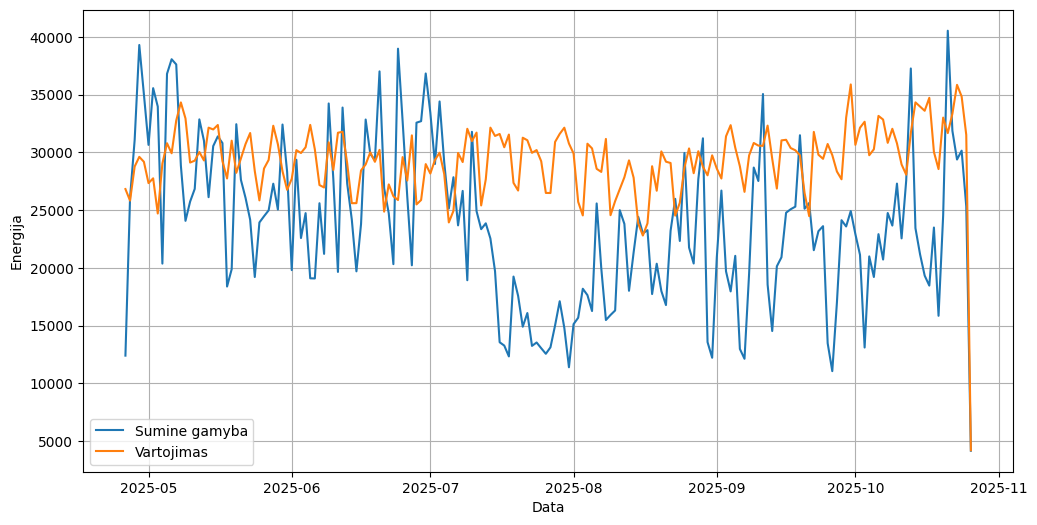

In [114]:
gamybaFiltered['ltu'] = pd.to_datetime(gamybaFiltered['ltu'])
gamybaFiltered['diena'] = gamybaFiltered['ltu'].dt.date
dfDienosSuma = gamybaFiltered.groupby('diena')['value'].sum().reset_index()
dfDienosSuma.rename(columns={'value': 'sumine'}, inplace=True)
print(dfDienosSuma.head())


vart = requests.get(urlv, params=params)
dfVart = pd.DataFrame(vart.json())
dfVart['ltu'] = pd.to_datetime(dfVart['ltu'])
dfVart['diena'] = dfVart['ltu'].dt.date
dfVartDienos = dfVart.groupby('diena')['value'].sum().reset_index()
dfVartDienos.rename(columns={'value': 'vartojimas'}, inplace=True)


dfVisi = pd.merge(dfDienosSuma, dfVartDienos, on='diena', how='inner')
print(dfVisi.head())


plt.figure(figsize=(12,6))
plt.plot(dfVisi['diena'], dfVisi['sumine'], label='Sumine gamyba')
plt.plot(dfVisi['diena'], dfVisi['vartojimas'], label='Vartojimas')
plt.xlabel('Data')
plt.ylabel('Energija')
plt.legend()
plt.grid(True)
plt.show()

        diena     sumine  vartojimas  disbalansas
0  2025-04-26  12408.862   26821.305    14412.443
1  2025-04-27  26064.069   25817.147     -246.922
2  2025-04-28  31077.415   28771.258    -2306.157
3  2025-04-29  39286.909   29607.791    -9679.118
4  2025-04-30  35016.648   29177.791    -5838.857


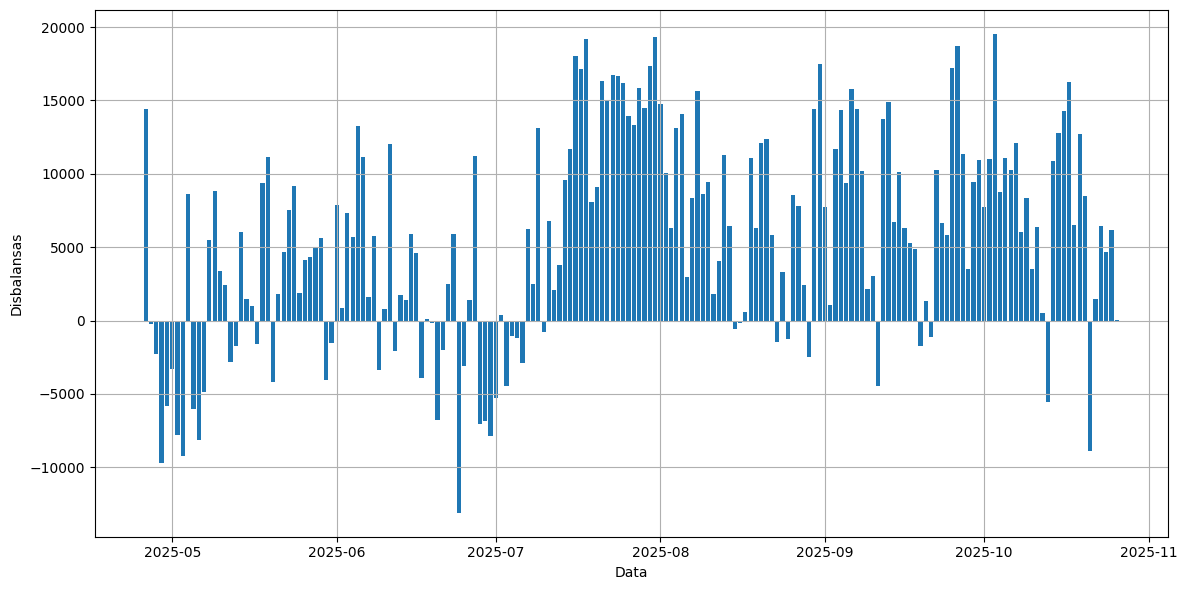

In [111]:
dfVisi['disbalansas'] = dfVisi['vartojimas'] - dfVisi['sumine']

print(dfVisi.head())

plt.figure(figsize=(12,6))
plt.bar(dfVisi['diena'], dfVisi['disbalansas'])
plt.xlabel('Data')
plt.ylabel('Disbalansas')
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
gamybaFiltered['metuMenesis'] = gamybaFiltered['ltu'].dt.to_period('M')
dfMenesiai = gamybaFiltered.groupby(['metuMenesis', 'id'])['value'].sum().reset_index()
dfMenesiai['proc'] = dfMenesiai.groupby('metuMenesis')['value'].transform(lambda x: x / x.sum() * 100)
print(dfMenesiai.head())


  metuMenesis   id      value       proc
0     2025-04  102  35457.038  24.647950
1     2025-04  103   6869.798   4.775538
2     2025-04  104  36837.393  25.607503
3     2025-04  105   9646.276   6.705606
4     2025-04  106  55043.398  38.263403


C:\Users\Home\AppData\Local\Temp\ipykernel_12848\2427571909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamybaFiltered['metuMenesis'] = gamybaFiltered['ltu'].dt.to_period('M')


In [ ]:
id_to_name = {
    102: "Saule",
    103: "Kaupimo",
    104: "Hidro",
    105: "Silumine",
    106: "Vejas"
}

dfMenesiai['source_name'] = dfMenesiai['id'].map(id_to_name)
for month, group in dfMenesiai.groupby('metuMenesis'):
    plt.figure(figsize=(6,6))
    plt.pie(group['proc'], labels=group['source_name'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Gamybos dalys pagal menesius: {month}')
    plt.tight_layout()
    plt.show()

In [124]:
hidro_id = 104

hidro = gamybaFiltered[gamybaFiltered['id'] == hidro_id].copy()
hidro['on'] = hidro['value'] > 0
hidro['prev_on'] = hidro['on'].shift(1, fill_value=False)
start_count = ((hidro['on'] == True) & (hidro['prev_on'] == False)).sum()
print(f"Hidroelektrinės įsijungimų skaičius: {start_count}")
total_hours = hidro['on'].sum()
print(f"Hidroelektrinė veikė iš viso {total_hours} valandų")

Hidroelektrinės įsijungimų skaičius: 1
Hidroelektrinė veikė iš viso 4381 valandų


In [132]:
vartFiltered['weekday'] = vartFiltered['ltu'].dt.day_name()
weekdaySum = vartFiltered.groupby('weekday')['value'].sum().reset_index()
weekdaySum.rename(columns={'value': 'suminis'}, inplace=True)
weekdaySum = weekdaySum.sort_values(by='suminis', ascending=False)
print(weekdaySum)

     weekday     suminis
4   Thursday  801058.356
6  Wednesday  799278.680
0     Friday  792575.498
1     Monday  785092.766
5    Tuesday  780309.016
2   Saturday  713851.343
3     Sunday  703081.645


In [ ]:
vartFiltered['weekday'] = vartFiltered['ltu'].dt.day_name()     
vartFiltered['hour'] = vartFiltered['ltu'].dt.hour

avgWeek = vartFiltered.groupby(['weekday','hour'])['value'].mean().reset_index()
avgWeek.rename(columns={'value': 'vidutinis vartojimas'}, inplace=True)

weekdayOrder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avgWeek['weekday'] = pd.Categorical(avgWeek['weekday'], categories=weekdayOrder, ordered=True)
avgWeek = avgWeek.sort_values(['weekday','hour'])

print(avgWeek)

   weekday  hour  vidutinis vartojimas
24  Monday     0           1033.679269
25  Monday     1            986.276385
26  Monday     2            964.989923
27  Monday     3            956.819154
28  Monday     4            964.998692
..     ...   ...                   ...
91  Sunday    19           1278.745192
92  Sunday    20           1316.638846
93  Sunday    21           1296.966731
94  Sunday    22           1222.308269
95  Sunday    23           1116.342192

[168 rows x 3 columns]


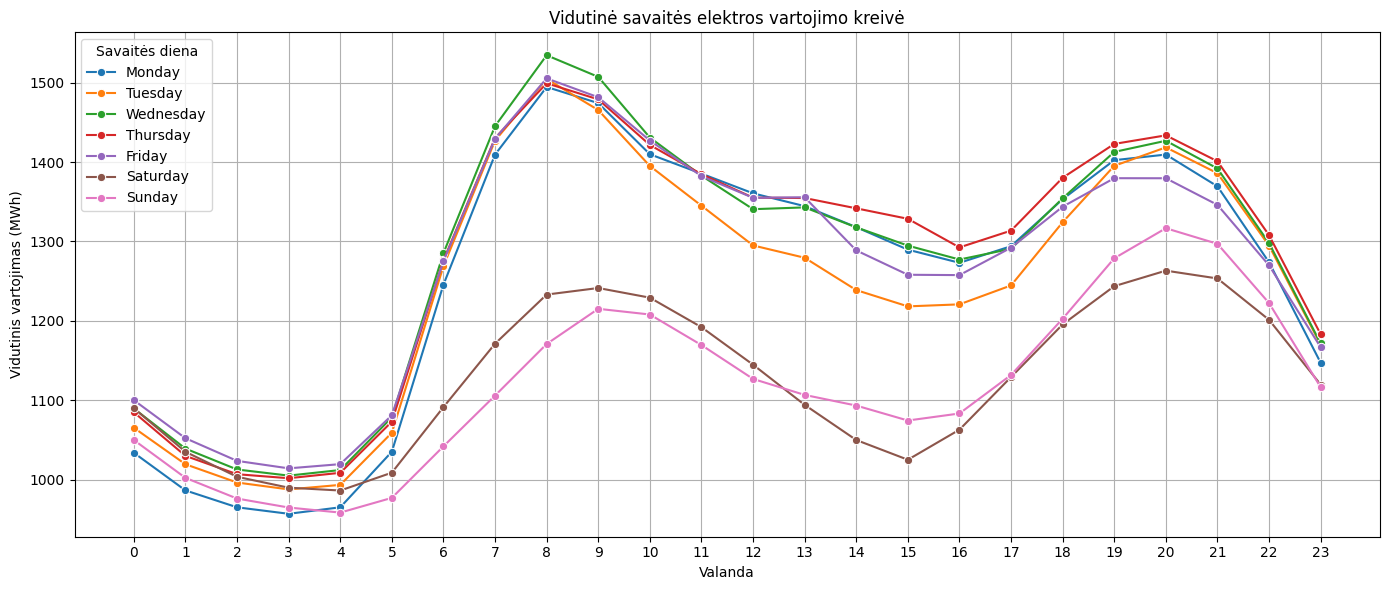

In [139]:
plt.figure(figsize=(14,6))

# Lineplot su skirtingomis linijomis kiekvienai savaitės dienai
sns.lineplot(data=avgWeek, x='hour', y='vidutinis vartojimas', hue='weekday', marker='o')

plt.title('Vidutinė savaitės elektros vartojimo kreivė')
plt.xlabel('Valanda')
plt.ylabel('Vidutinis vartojimas (MWh)')
plt.xticks(range(0,24))
plt.grid(True)
plt.legend(title='Savaitės diena')
plt.tight_layout()
plt.show()


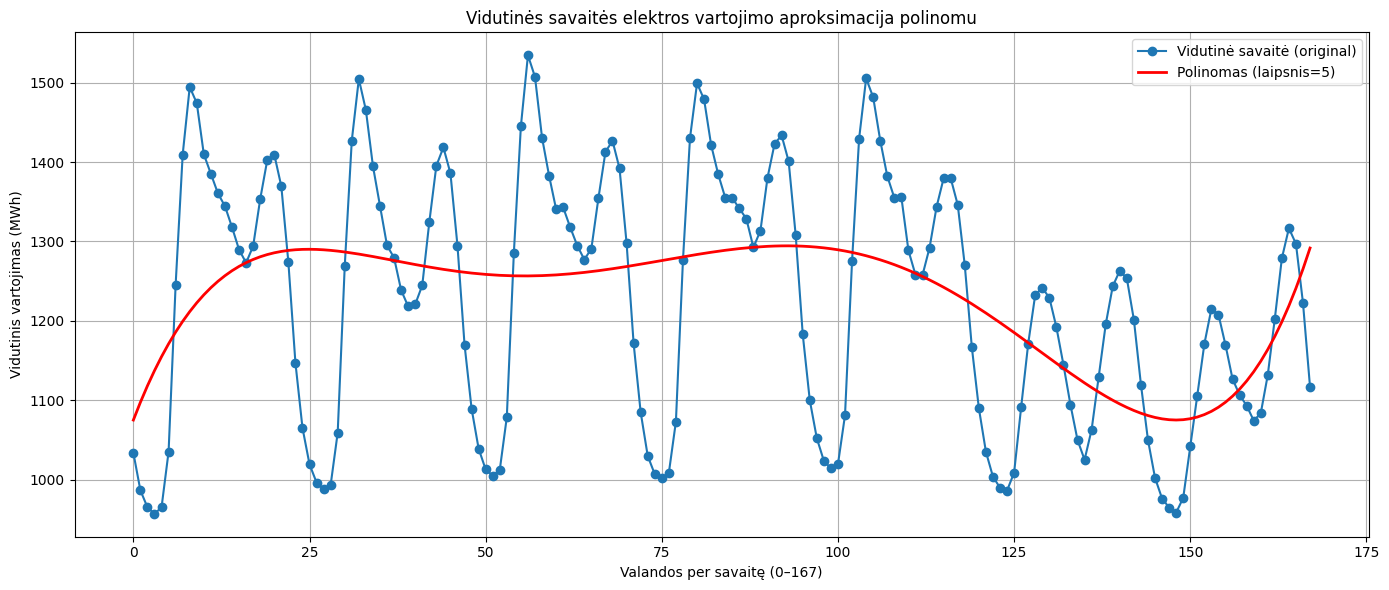

In [ ]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avgWeek['weekday'] = pd.Categorical(avgWeek['weekday'], categories=weekday_order, ordered=True)
avgWeek = avgWeek.sort_values(['weekday','hour']).reset_index(drop=True)

x = np.arange(len(avgWeek)) 
y = avgWeek['vidutinis vartojimas'].values
deg = 5

coeffs = np.polyfit(x, y, deg)
poly = np.poly1d(coeffs)

y_fit = poly(x)

plt.figure(figsize=(14,6))
plt.plot(x, y, label='Vidutinė savaitė (original)', marker='o')
plt.plot(x, y_fit, label=f'Polinomas (laipsnis={deg})', color='red', linewidth=2)
plt.title('Vidutinės savaitės elektros vartojimo aproksimacija polinomu')
plt.xlabel('Valandos per savaitę (0–167)')
plt.ylabel('Vidutinis vartojimas (MWh)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
